# Differential Equation Solving 3

Notebook to implement the Verlet algorithm to solve Newton-like equations of motion for Abertay University undergrad course MAT301 (JT, 2022).

## Verlet algorithm
Our final type of numerical scheme is the **Verlet algorithm**, also known as Verlet Integration.

This scheme is popular, particularly in Game Physics for solving equations of motion of the form 

$$
x''=\frac{{\rm d}^2x}{{\rm{d}}t^2}=a=\frac{F}{m},
$$

for displacement $x$, acceleration $a$, applied force $F$ and mass $m$. We encountered several equations of this type in MAT201: these relate forces acting upon a body to the acceleration, and hence to the velocity and displacement of the body.

#### Setting up Libraries

As always, we'll make use of some clever python tools for plotting and maths, so our first step is to load in the libraries that store these tools:

In [12]:
## Library
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

## Simple attempt: Euler
One way to attempt problems of this kind is to use the **Euler Method** we were introduced to in a previous session:

$$
\begin{align}
v_{n+1}=v_n+a_n h, \\
x_{n+1}=x_n+v_n h.
\end{align}
$$

There are two clear issues here

1.   We have already seen that Euler is not particularly an accurate algorithm. 
2.   The displacement $x$ will depend on the velocity, and hence the error in the velocity calculation will also trickle into and enhance the error in displacement.

By Taylor expanding in time forwards and backwards and combining the results, we can determine the next displacement value in time:

$$
x_{n+1}=2x_n-x_{n-1}+h^2a_n.
$$ 

The velocity can be similarly updated combining forwards and backwards differences:

$$
v_n=x_n'=\frac{1}{2h}\left(x_{n+1}-x_{n-1}\right).
$$

This ensures that the error does not accumulate, since the velocity calculation is recalculated from a more accurate displacement calculation at each step.

One additional complexity is that this model is not self-starting: each new displacement value requires two previous values, which is an issue for an initial value problem. One common approach is to use a single Euler step to calculate the first displacement, with subsequent values using the Verlet algorithm.

A second complexity is that the velocity calculation requires knowledge of the **next** displacement in time, so calculation of this lags behind the displacement calculation. If the velocity is required after 5 steps, we would need to calculate the displacement over 6 steps to achieve the required solution.

## Example 9.4 ##

To illustrate the algorithm behaviour, we'll repeat Example 9.4 from the Lecture notes. In this example, a mass of $2$kg is propelled along a rough horizontal table which exerts a resistance of $0.4$N. The initial velocity of the mass is $8{\rm{ms}}^{-1}$. We are to use the Verlet algorithm with a step size of $h=0.1$ to approximate the velocity and displacement of the mass after $0.5$s, assuming $x\left(t=0\right)=0$.

To evaluate this, we must first evaluate the acceleration at a given time. In this example the acceleration (force per unit mass) is constant. This means that we can store this value as a constant in Python:

In [13]:
a_n = - 0.4 * 0.5

Let's set up some other parameters. The step size will determine the times when we need to evaluate displacement and time. We also need to store values of displacement and time, so we'll create an array of values of the same length as the array of times.

In [14]:
a = 0.0
b = 0.5
h = 0.1
N = int((b - a) / h) # number of steps
print("N=", N)
t = np.arange(a, b + h, h)  # range of x
print("t=", t)
x = np.zeros(len(t) + 1)
x[0] = 0.0
v = np.zeros(len(t))
v[0] = 8.0

N= 5
t= [0.  0.1 0.2 0.3 0.4 0.5]


The Verlet algorithm isn't self starting, so we'll calculate the displacement at $n=1$ using Euler, then loop around all the other values to calculate the next displacement and the velocity. We'll do this until we have performed the required number of steps $N$:

In [15]:
x[1] = x[0] + v[0] * h
for i in range(1, N+1):
    x[i + 1] = 2.0 * x[i] - x[i-1] + h * h * a_n
    v[i] = 0.5 * (x[i + 1] - x[i - 1]) / h
print("t(N):",t[N],", x(N):", x[N],", v(N):", v[N])

t(N): 0.5 , x(N): 3.9800000000000013 , v(N): 7.910000000000008


We can see that the desired solution at $t=0.5$ is given by the final element in the list of $x$ and $v$, and matches the values we calculated in the lectures.

This equation of motion also has exact solutions (the acceleration is constant so we can use $v=u+at$ and $s=ut+\frac{1}{2}at^2$).  The exact solutions are:

$$
\begin{align}
 v(t)&=8-0.2t \\
 x(t)&=8t-0.1t^2
\end{align}
$$

Lets compare our numerical approximation with the true solutions:

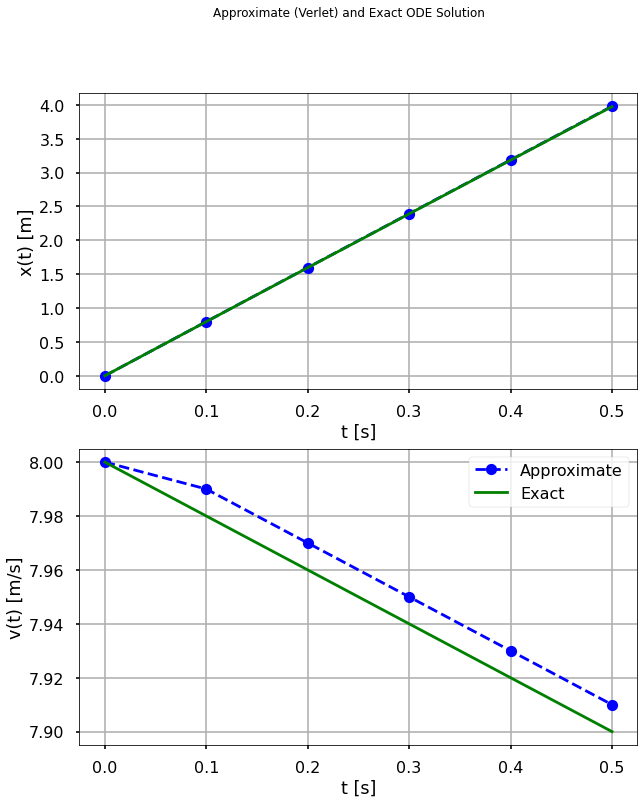

In [17]:
plt.style.use('seaborn-poster')
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(10, 12)
fig.suptitle('Approximate (Verlet) and Exact ODE Solution')
ax1.plot(t[0:N + 1], x[0:N + 1], 'bo--', label='Approximate')
ax1.plot(t, 8.0 * t - 0.1 * t * t, 'g', label='Exact')
ax1.set(ylabel='x(t) [m]', xlabel='t [s]')
ax1.grid()
ax2.plot(t[0:N + 1], v[0:N + 1], 'bo--', label='Approximate')
ax2.plot(t, 8.0 - 0.2 *  t, 'g', label='Exact')
ax2.set(ylabel='v(t) [m/s]', xlabel='t [s]')
ax2.grid()
ax2.legend(loc='best')
plt.show()

This is not a particularly exciting example, but it matches the mathematical steps you were shown in the lectures. 

Indeed, with a constant acceleration, this makes the solution easy to approximate with the Verlet algorithm. The major difference arises in the velocity arises from the Euler step, but it is worth noting that apart from this offset, the remaining velocity steps are a consistent difference from the true values. The initial error does not grow in time and cause further divergence of the solutions.

## Further work

Try choosing a tutorial question or past paper exam question **once you have worked through the mathematical steps** and see if you can create a new implementation of RK4 to verify the solution!